In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer

In [98]:
df= pd.read_excel("C:/Supriyaa-spark-notes/Superstore_Sales.xls")
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [99]:
df['Customer Name'].value_counts()

Darren Budd          41
Ed Braxton           38
Brad Thomas          35
Carlos Soltero       33
Patrick Jones        30
                     ..
Natalie DeCherney     1
Dorothy Dickinson     1
Craig Carreira        1
Maria Etezadi         1
Sample Company A      1
Name: Customer Name, Length: 795, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   int64         
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

In [101]:
df.dropna(inplace=True)

In [102]:
df

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,40464,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,41183,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,41183,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,40734,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,40418,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,40399,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09
8395,7766,55558,40399,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11
8396,7906,56550,40641,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10
8397,7907,56550,40641,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,2011-04-09


In [103]:
#Convert date columns into panda datatime
# the column 'Order Date' is having unix  time cast as double which has to be converted to datetime format
import datetime
def unixToDatetime(inp):
    seconds = (inp - 25569) * 86400.0
    return datetime.datetime.utcfromtimestamp(seconds)
df.loc[:,'Order Date'] = df['Order Date'].apply(lambda x : unixToDatetime(x))
df.loc[:,'Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') 

In [104]:
df

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09
8395,7766,55558,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11
8396,7906,56550,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10
8397,7907,56550,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,2011-04-09


In [105]:
# Calculate RFM metrics  
df['Order Date'] = pd.to_datetime(df['Order Date'])
snapshot_date = df['Order Date'].max() # Set the snapshot date for calculating recency

df['Recency'] = (snapshot_date - df['Order Date']).dt.days
df['Frequency'] = df.groupby('Customer Name')['Order ID'].transform('count') 
df['Monetary'] = df.groupby('Customer Name')['Sales'].transform('sum')

# Select relevant columns for clustering
data = df[['Recency', 'Frequency']]

# Perform standardization on the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [106]:
# Assign scores to each RFM factor
score_criteria = {
    'Recency': [4, 3, 2, 1],  # Assign higher scores to more recent purchases
    'Frequency': [1, 2, 3, 4],  # Assign higher scores to more frequent purchases
    'Monetary': [1, 2, 3, 4]  # Assign higher scores to higher spending
}

for factor, scores in score_criteria.items():
    df[f'{factor}_Score'] = pd.qcut(df[factor], q=4, labels=scores)
df

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Product Name,Product Container,Product Base Margin,Ship Date,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,809,13,8796.4200,2,3,1
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,90,4,15179.6100,4,1,2
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,90,4,15179.6100,4,1,2
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,R380,Small Box,0.58,2011-07-12,539,5,6611.4365,3,1,1
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,855,33,55575.0880,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,...,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09,874,6,14156.2200,2,1,2
8395,7766,55558,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,...,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11,874,6,14156.2200,2,1,2
8396,7906,56550,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,...,"Executive Impressions 14""",Small Pack,0.41,2011-04-10,632,12,34301.5175,3,2,4
8397,7907,56550,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,...,Talkabout T8367,Small Box,0.56,2011-04-09,632,12,34301.5175,3,2,4


In [107]:
# Combine scores to create RFM segment
df['RFM_Segment'] = df['Recency_Score'].astype(str) + df['Frequency_Score'].astype(str) + df['Monetary_Score'].astype(str)

# Calculate RFM score (weighted average approach)
df['RFM_Score'] = df['Recency_Score'].astype(int) * 0.4 + df['Frequency_Score'].astype(int) * 0.3 + df['Monetary_Score'].astype(int) * 0.3


In [108]:
# Analyze the characteristics and behaviors of each segment
segment_analysis = df.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'mean',
    'Customer Name': 'count'
}).rename(columns={'Customer Name': 'Customer Count'})

# Display the segment analysis
print(segment_analysis)


                 Recency  Frequency      Monetary  RFM_Score  Customer Count
RFM_Segment                                                                 
111          1286.890675   6.286174   5536.695836        1.0             311
112          1276.736318   7.293532  15195.369960        1.3             201
113          1292.250000   7.576923  24638.043615        1.6              52
114          1304.263158   6.789474  38402.671211        1.9              19
121          1270.696296  10.807407   8205.406070        1.3             135
...                  ...        ...           ...        ...             ...
434           182.760234  16.011696  44957.799614        3.7             171
441           219.000000  19.000000  11448.060000        3.1               2
442           170.777778  19.444444  15094.811278        3.4               9
443           175.573991  22.520179  26698.521738        3.7             223
444           174.099617  25.957854  56438.948370        4.0             261

Optimal number of clusters: 2


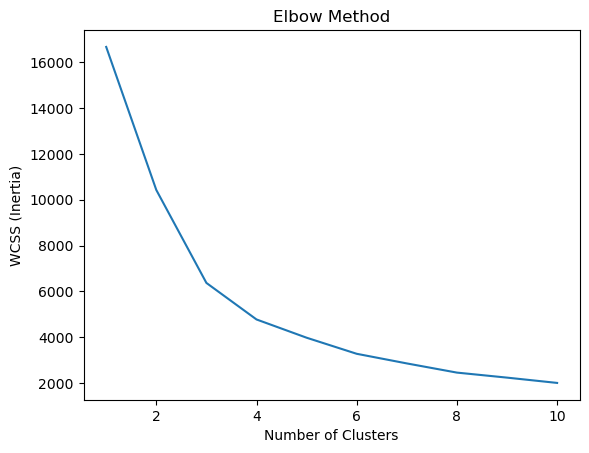

In [109]:
# Use the elbow method to find the optimal number of clusters
max_clusters = 10
inertia = []

for num_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    
# Find the optimal number of clusters
diff = [inertia[i] - inertia[i+1] for i in range(len(inertia)-1)]
optimal_num_clusters = diff.index(max(diff)) + 2
print("Optimal number of clusters:", optimal_num_clusters)

# Plot the elbow curve
plt.plot(range(1, max_clusters+1), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

Optimal number of clusters: 3


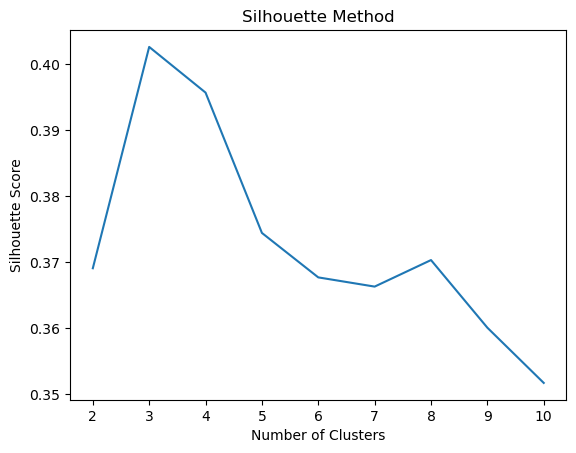

In [110]:
#Silhouette method to find optimal number of clusters
max_clusters = 10
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_num_clusters)

# Plot the Silhouette scores
plt.plot(range(2, max_clusters+1), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [111]:
# Choose the optimal number of clusters based on the above methods
num_clusters = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the dataset
df['Cluster'] = kmeans.labels_


In [112]:
# Analyze the cluster statistics
cluster_stats = df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer Name': 'count'
}).rename(columns={'Customer Name': 'Count'})

print(cluster_stats)

             Recency  Frequency      Monetary  Count
Cluster                                             
0         357.057086  13.819062  24440.852898   4029
1        1090.742280  14.069886  24698.845565   4307


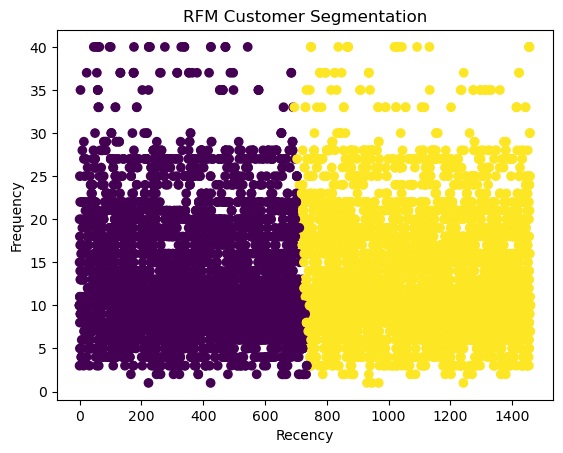

In [113]:
# Plot the clusters
plt.scatter(df['Recency'], df['Frequency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Customer Segmentation')
plt.show()

In [114]:
# Choose the optimal number of clusters based on the above methods
num_clusters = 3

# Perform K-means clustering
kmeans1 = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans1.fit(scaled_data)

# Add the cluster labels to the dataset
df['Cluster'] = kmeans1.labels_
# Analyze the cluster statistics
cluster_stats = df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer Name': 'count'
}).rename(columns={'Customer Name': 'Count'})

print(cluster_stats)

             Recency  Frequency      Monetary  Count
Cluster                                             
0         353.492017  10.509612  18576.973638   3069
1        1127.428615  11.388347  19855.440334   3278
2         681.665158  23.474610  41604.453828   1989


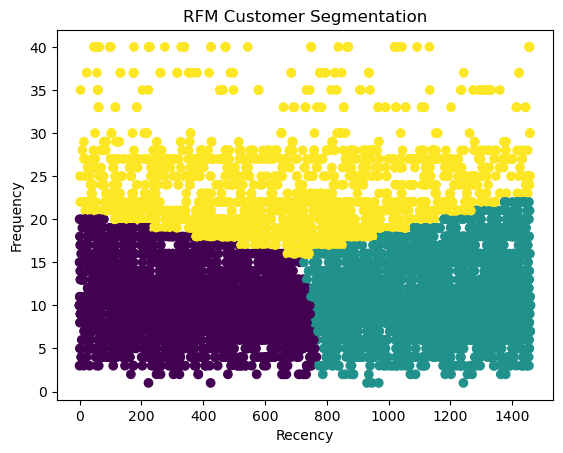

In [115]:
# Plot the clusters
plt.scatter(df['Recency'], df['Frequency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Customer Segmentation')
plt.show()

In [116]:
#Train a linear regression model for each cluster
predictions = {}

for cluster in range(num_clusters):
    # Filter the data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Split the data into features and target
    X = cluster_data[['Recency', 'Frequency']]
    y = cluster_data['Monetary']

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Store the model in the predictions dictionary
    predictions[cluster] = model

In [117]:
#Make predictions for the next purchase
# Provide the RFM values for a new customer
new_customer_rfm = {'Recency': 30, 'Frequency': 5}  

# Determine the cluster for the new customer
scaled_rfm = scaler.transform([list(new_customer_rfm.values())])
cluster = kmeans1.predict(scaled_rfm)[0]

# Get the corresponding model for the cluster and make the prediction
model = predictions[cluster]
predicted_monetary = model.predict([list(new_customer_rfm.values())[:2]])

print("Predicted monetary value for the next purchase:", predicted_monetary[0])

Predicted monetary value for the next purchase: 9207.572466944055


In [118]:
#Make predictions for the next purchase
# Provide the RFM values for a new customer
new_customer_rfm = {'Recency': 30, 'Frequency': 5}  

# Determine the cluster for the new customer
scaled_rfm = scaler.transform([list(new_customer_rfm.values())])
cluster = kmeans.predict(scaled_rfm)[0]

# Get the corresponding model for the cluster and make the prediction
model = predictions[cluster]
predicted_monetary = model.predict([list(new_customer_rfm.values())[:2]])

print("Predicted monetary value for the next purchase:", predicted_monetary[0])

Predicted monetary value for the next purchase: 9207.572466944055


In [127]:
#To retrieve the next purchase prediction for a customer

# Provide the customer name as input
customer_name = "Patrick Jones"

# Find the RFM values for the customer
customer_rfm = df.loc[df['Customer Name'] == customer_name, ['Recency', 'Frequency']]

if not customer_rfm.empty:
    # Determine the cluster for the customer
    scaled_rfm = scaler.transform(customer_rfm)
    cluster = kmeans1.predict(scaled_rfm)[0]

    if cluster in predictions:
        # Retrieve the corresponding model for the cluster
        model = predictions[cluster]

        # Make the prediction for the next purchase
        predicted_monetary = model.predict(customer_rfm)

        print("Predicted monetary value for the customer",customer_name,"next purchase:", predicted_monetary[0])
    else:
        print("No prediction available for the customer",customer_name)
else:
    print("Customer",customer_name," not found.")

Predicted monetary value for the customer Patrick Jones next purchase: 50695.59091735644


In [128]:
#To retrieve the next purchase prediction for a customer

# Provide the customer name as input
customer_name = "Patrick Jones"

# Find the RFM values for the customer
customer_rfm = df.loc[df['Customer Name'] == customer_name, ['Recency', 'Frequency']]

if not customer_rfm.empty:
    # Determine the cluster for the customer
    scaled_rfm = scaler.transform(customer_rfm)
    cluster = kmeans.predict(scaled_rfm)[0]

    if cluster in predictions:
        # Retrieve the corresponding model for the cluster
        model = predictions[cluster]

        # Make the prediction for the next purchase
        predicted_monetary = model.predict(customer_rfm)

        print("Predicted monetary value for the customer",customer_name,"next purchase:", predicted_monetary[0])
    else:
        print("No prediction available for the customer",customer_name)
else:
    print("Customer",customer_name," not found.")

Predicted monetary value for the customer Patrick Jones next purchase: 52981.6786939638


In [133]:
# Calculate average RFM values for each cluster
rfm_values = df[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
scaled_rfm_values = scaler.fit_transform(rfm_values)
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)  # Set the number of clusters as per your choice
kmeans.fit(scaled_rfm_values)
cluster_avg_rfm = df.groupby(kmeans.labels_)['Recency', 'Frequency', 'Monetary'].mean()

In [134]:
# Identify clusters with higher average monetary values or frequencies indicating higher potential for future purchases
potential_clusters = cluster_avg_rfm[cluster_avg_rfm['Monetary'] > cluster_avg_rfm['Monetary'].mean()]

In [135]:
# Print the identified clusters
print(potential_clusters)

      Recency  Frequency      Monetary
1  727.209408  23.102175  47939.308123


In [149]:
# Get the customer names belonging to the potential clusters
customer_names = df['Customer Name']
potential_customer_names = customer_names[np.in1d(kmeans.labels_, potential_clusters.index)]

# Print the customer names
print(potential_customer_names)

1          Barry French
2          Barry French
3         Clay Rozendal
6          Carl Jackson
12          Carlos Daly
             ...       
8389    Grant Donatelli
8392       Harry Greene
8393       Harry Greene
8396       Frank Hawley
8397       Frank Hawley
Name: Customer Name, Length: 3124, dtype: object
